In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.io import wavfile

In [2]:
%matplotlib inline

### Goal here is to test out Matched Filtering via various methods in Python

First lets create a basic signal Test that we will use in our experiment

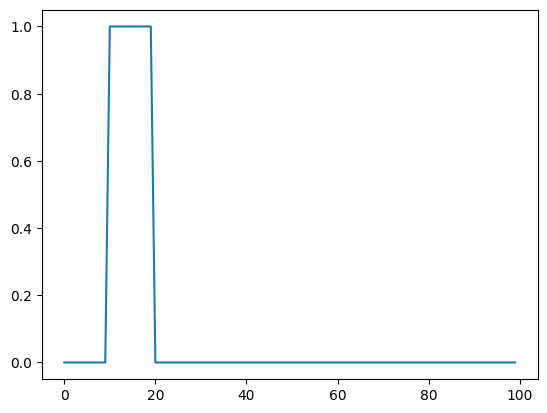

In [3]:
Test = np.zeros(100)
Test[10:20] = 1
plt.figure()
plt.plot(Test)

Beautiful, but in real life, signals wont come back like that.  Lets generate some noise and input those 10 units of 1 somewhere in the signal:

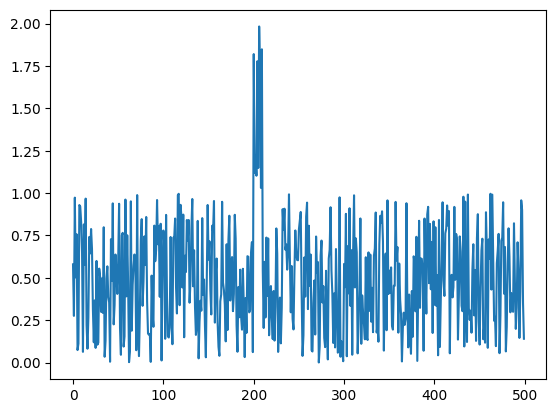

In [77]:
Signal = np.random.rand(500)
Signal[200:210] += 1
plt.figure()
plt.plot(Signal)


Now to match filter, we want to see at which point in that signal our test function overlaps exactly.  

Method 1: Thus at each point along the signal, we sum together the test function multiplied into the snippet of signal of the test functions length. We can then step through all steps of time... 

In [78]:
Correlation = np.zeros(len(Signal))

for i in np.arange(len(Correlation)):
    if len(Test)+i <= len(Signal):
        Correlation[i] = sum(Test*Signal[i:len(Test)+i])
    if len(Test)+i > len(Signal):
        #print(i)
        Correlation[i] = sum(Test[0:len(Signal)-len(Test)-i]*Signal[i:])
        

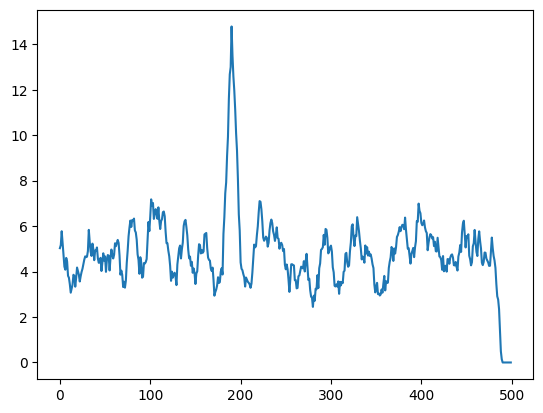

In [79]:
plt.figure()
plt.plot(Correlation)

In [80]:
Correlation[190]

np.float64(14.780241086236368)

Here we see a large peak centered at 190.  Considering we input the 10 digits of 1 at 200, and our test signal has 10 units of 0 before the cycle turns on, this occurs exactly where we expect.  The issue is this seems to be quite intensive on my poor laptop when attempting to process data.  Thus it is necessary to find an alternative way to process this -


Another way to calculate this is to consider that an alternative way to process this is via a convolution:

In [81]:
T_fft = np.fft.fft(Test,n=len(Signal))
S_fft = np.fft.fft(Signal)

C_fft = T_fft*S_fft

Correlation_method2 = np.fft.ifft(C_fft)

C:\Users\sterl\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\sterl\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


np.complex128(14.780241086236373+9.02929108539989e-16j)

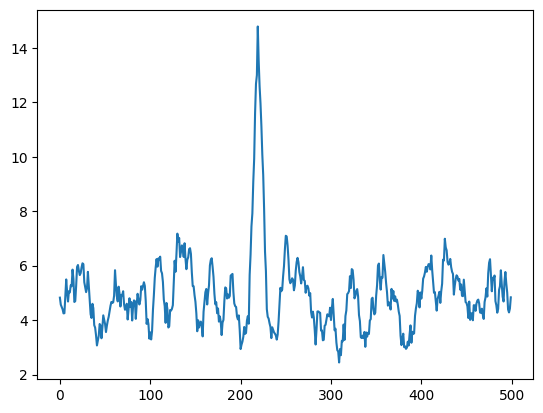

In [82]:
plt.figure()
plt.plot(Correlation_method2)
Correlation_method2[219]

As you can see, we recieve a nice looking, similar function, but there is an offset of about 20 units.  We can run this in different modes, like 'full' or 'same' but each has a offset either left or right of 20 units. 


Lets cheat and use someone elses functions for this! Should be quick and simple right?  To numpy, we can test their convolve() function and correlate() function

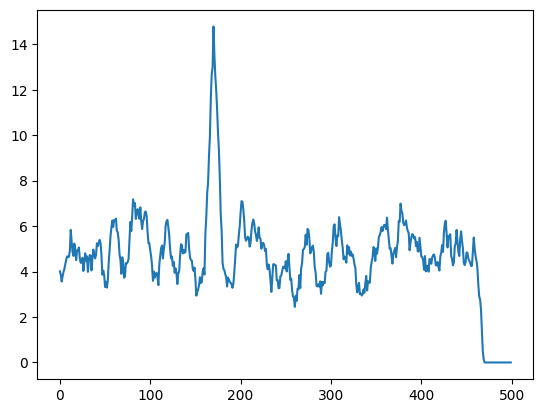

In [90]:
Correlation_method3 = np.convolve(Test,Signal,'same')
plt.figure()
plt.plot(Correlation_method3)

Looks nice but still offset no matter the mode used, as will our solution to the convolution

np.float64(3.4346333940609513)

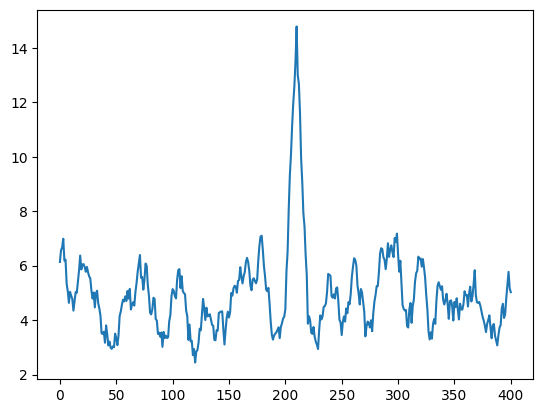

In [96]:
Correlation_method4 = np.correlate(Test,Signal)
plt.figure()
plt.plot(Correlation_method4)
Correlation_method4[190]

Also decent but offset.  There's probably a solution to this, but alas I do not know.  Lets go back and try to fix the more brute force but correct solution we had before...  Lets change our manual multiplication to a dot product.   Numpy should do the trick:

In [97]:
Correlation = np.zeros(len(Signal))

for i in np.arange(len(Correlation)):
    if len(Test)+i <= len(Signal):
        Correlation[i] = np.dot(Test,Signal[i:len(Test)+i])
    if len(Test)+i > len(Signal):
        #print(i)
        Correlation[i] = np.dot(Test[0:len(Signal)-len(Test)-i],Signal[i:])
        

np.float64(14.780241086236371)

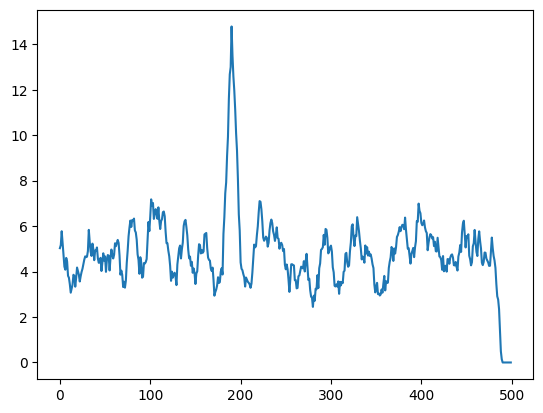

In [98]:
plt.figure()
plt.plot(Correlation)
Correlation[190]

This seemed to do the trick! No offset, and it ran insanely quick.  Huzzah as Chris would say. 